Abtract:Tiếp tục fine tune model

abtract:Chúng ta tiếp tục chỉnh sửa Stacking với final estimate sẽ là RF mà ta đã fine tune

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df=pd.read_csv("../../data/processed/DB02.csv")

In [3]:
df.head()

,HighBP,HighChol,BMI,Smoker,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,Sex,Age,Education,Income,Diabetes
0,1.0,0.0,26.0,0.0,1.0,0.0,1.0,3.0,5.0,1.0,4.0,6.0,8.0,0.0
1,1.0,1.0,26.0,1.0,0.0,1.0,0.0,3.0,0.0,1.0,12.0,6.0,8.0,0.0
2,0.0,0.0,26.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,13.0,6.0,8.0,0.0
3,1.0,1.0,28.0,1.0,1.0,1.0,1.0,3.0,0.0,1.0,11.0,6.0,8.0,0.0
4,0.0,0.0,29.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,8.0,5.0,8.0,0.0


In [4]:
#chuẩn bị data để huân luyện 
from sklearn.model_selection import train_test_split
x=df.drop('Diabetes',axis=1)
y=df['Diabetes']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [5]:
cols_to_scale = ['BMI', 'GenHlth', 'MentHlth','Age','Education','Income']

In [6]:
#Scale dữ liệu
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train[cols_to_scale]=sc.fit_transform(x_train[cols_to_scale])
x_train

,HighBP,HighChol,BMI,Smoker,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,Sex,Age,Education,Income
11041,0.0,1.0,-0.832954,0.0,1.0,1.0,1.0,-0.780723,-0.467193,0.0,0.487735,0.099975,0.620641
27964,1.0,0.0,-0.552929,0.0,1.0,1.0,1.0,-0.780723,0.016710,0.0,1.535319,1.070990,0.620641
30967,1.0,1.0,-0.412916,0.0,1.0,0.0,1.0,0.121808,-0.467193,0.0,-0.210655,-0.871040,-1.221673
895,0.0,1.0,-1.112979,1.0,1.0,1.0,1.0,-1.683254,-0.467193,0.0,0.138540,0.099975,1.081219
67503,1.0,0.0,1.127222,0.0,1.0,1.0,1.0,0.121808,-0.467193,0.0,1.186124,-0.871040,-0.761094
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,0.0,0.0,1.267235,0.0,0.0,0.0,1.0,1.926870,-0.467193,1.0,0.487735,1.070990,-2.142830
6265,1.0,1.0,-0.832954,1.0,1.0,1.0,1.0,1.024339,1.952324,1.0,0.487735,-2.813070,-1.682251
54886,1.0,1.0,-0.552929,1.0,1.0,1.0,0.0,1.024339,3.162083,1.0,1.186124,-1.842055,-1.221673
860,0.0,0.0,-0.132891,0.0,1.0,0.0,1.0,1.024339,-0.467193,0.0,-0.559849,-0.871040,-1.221673


In [7]:
x_test[cols_to_scale]=sc.transform(x_test[cols_to_scale])
x_test

,HighBP,HighChol,BMI,Smoker,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,Sex,Age,Education,Income
51238,1.0,1.0,0.007122,0.0,1.0,1.0,1.0,-1.683254,-0.467193,1.0,0.487735,1.070990,1.081219
15606,1.0,1.0,-0.412916,1.0,0.0,0.0,1.0,-0.780723,-0.467193,1.0,-1.607433,1.070990,1.081219
39330,1.0,1.0,-0.132891,0.0,0.0,0.0,1.0,0.121808,-0.467193,0.0,1.535319,-0.871040,0.160062
44019,1.0,1.0,-0.272904,1.0,1.0,0.0,1.0,0.121808,-0.467193,1.0,0.138540,-0.871040,1.081219
45249,1.0,1.0,0.567172,0.0,0.0,1.0,1.0,-0.780723,-0.467193,1.0,0.836929,0.099975,0.620641
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9350,1.0,1.0,1.267235,1.0,0.0,0.0,1.0,-0.780723,-0.467193,0.0,0.138540,-0.871040,-0.761094
31894,0.0,0.0,-1.393004,0.0,1.0,1.0,1.0,-1.683254,-0.225241,0.0,0.138540,1.070990,1.081219
47170,1.0,1.0,-0.272904,1.0,1.0,1.0,1.0,1.926870,-0.467193,0.0,0.836929,-1.842055,0.620641
51946,0.0,0.0,-0.412916,0.0,1.0,1.0,1.0,0.121808,-0.467193,0.0,-2.655017,-0.871040,-1.221673


In [18]:
#đánh giá training bới cross-validation với k-fold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score,classification_report, confusion_matrix, accuracy_score
# Hàm đánh giá mô hình với các chỉ số chung
def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Cross-validation với k=5 và tiêu chí đánh giá là 'accuracy'
    cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    print(f"{model.__class__.__name__} - Cross-validation scores:", cv_scores)
    print(f"Mean cross-validation score: {cv_scores.mean()}\n")
    
    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(x_test)
    
    # Các chỉ số đánh giá trên tập kiểm tra
    print(f"{model.__class__.__name__} - Accuracy Score:", accuracy_score(y_test, y_pred))
    print(f"{model.__class__.__name__} - F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print(f"{model.__class__.__name__} - Classification Report:\n", classification_report(y_test, y_pred))
    print(f"{model.__class__.__name__} - Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
param_grid_rf = {
    'n_estimators': [50, 1000, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}
rf = RandomForestClassifier()
rf_ramdom = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, n_iter=200, random_state=42, n_jobs=-1)

In [ ]:
rf_ramdom.fit(x_train,y_train)

In [ ]:
yRF_pred=rf_ramdom.predict(x_test)

In [ ]:
rf_ramdom.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 10,
 'criterion': 'entropy',
 'bootstrap': True}

In [ ]:
evaluate_model(rf_ramdom, x_train, y_train, x_test, y_test)

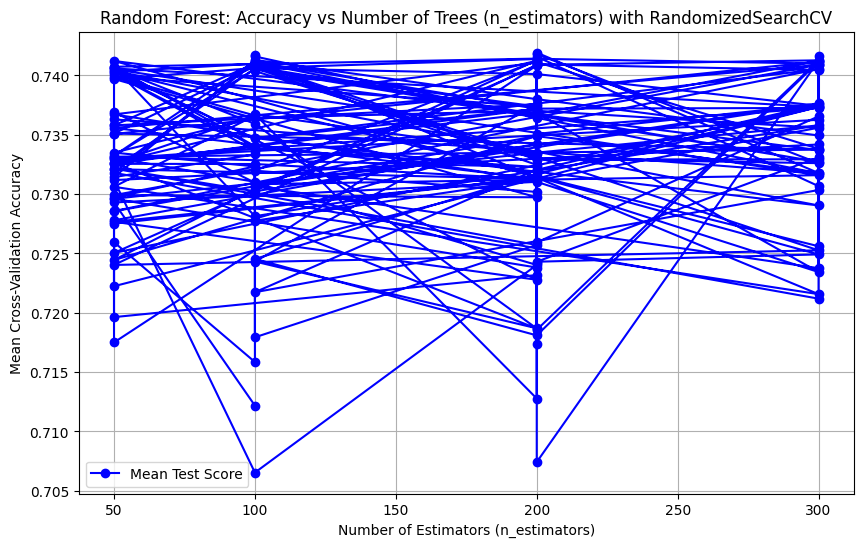

In [ ]:
# Trích xuất độ chính xác cho từng lần thử từ RandomizedSearchCV
results = pd.DataFrame(rf_ramdom.cv_results_)

# Vẽ biểu đồ độ chính xác
plt.figure(figsize=(10, 6))
plt.plot(results['param_n_estimators'], results['mean_test_score'], 'bo-', label='Mean Test Score')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Random Forest: Accuracy vs Number of Trees (n_estimators) with RandomizedSearchCV')
plt.grid(True)
plt.legend()
plt.savefig('../../results/img/accuracy_with_RF_B4.png',dpi=300, bbox_inches='tight')
plt.show()

In [14]:
import joblib
#save model RF

joblib.dump(rf_ramdom, '../../results/output_files/B4_RFmodel_finetune.pkl')

['../../results/output_files/B4_RFmodel_finetune.pkl']